In [1]:
import heeps
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
conf = dict(
    dir_current='/Users/cdelacroix/INSTRUMENTS/METIS/heeps_analysis',
    add_bckg = False,
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
phase_screens, amp_screens, tiptilts, misaligns = heeps.wavefront.load_errors(verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, onaxis=False, savefits=True, verbose=True, **conf)
psfs = heeps.wavefront.propagate_cube(wf, phase_screens=phase_screens, \
    amp_screens=amp_screens, tiptilts=tiptilts, misaligns=misaligns, onaxis=True, \
    savefits=True, verbose=True, **conf)

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, beam_ratio=0.2568
   ravc_calc=True, ravc_t=0.7608, ravc_r=0.6213
   npupil=285, pscale=5.47 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)

Load pupil from 'ELT_allglass.fits'
Load phase screens from 'COMPASS_201810_RandomWind_100screens_meters.fits'
   nscreens=10 (nframes=10, nstep=1)
Create single off-axis PSF
   apply ring apodizer: ravc_t=0.7608, ravc_r=0.6213
   apply lyot stop from 'ls_ravc_allglass_285.fits'
   extract PSF on the detector: ndet=403
Create on-axis PSF cube
   2021-02-26 14:35:15: e2e simulation starts, using 10 cores
   2021-02-26 14:35:21: finished, elapsed 6.382 seconds


In [3]:
seps=[]
adis=[]
for starphot in [0.05, 0.1, 0.5, 1, 5, 10, 100, 1e11]:
    print(starphot)
    a, b = heeps.contrast.cc_adi(starphot=starphot, savepsf=False, savefits=False, verbose=False, **conf)
    seps.append(a)
    adis.append(b)

0.05
0.1
0.5
1
5
10
100
100000000000.0


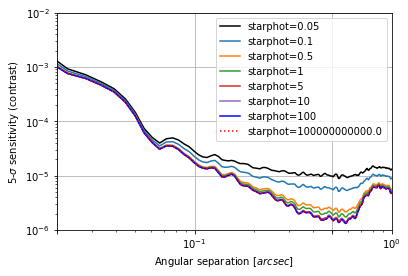

In [4]:
plot(seps[0], adis[0], 'k', label='starphot=%s'%0.05)
plot(seps[1], adis[1], label='starphot=%s'%0.1)
plot(seps[2], adis[2], label='starphot=%s'%0.5)
plot(seps[3], adis[3], label='starphot=%s'%1)
plot(seps[4], adis[4], label='starphot=%s'%5)
plot(seps[5], adis[5], label='starphot=%s'%10)
plot(seps[6], adis[6], 'b', label='starphot=%s'%100)
plot(seps[7], adis[7], 'r:', label='starphot=%s'%1e11)
loglog()
grid(True)
legend()
xlabel('Angular separation $[arcsec]$')
ylabel('5-$\sigma$ sensitivity (contrast)')
xticks([0.02, 0.1, 0.5, 1])
xlim(0.02,1)
ylim(1e-6,1e-2)
savefig('starphot.png', transparent=True, dpi=300)